In [1]:
import sys
import os

# Get the current working directory
# Get project root (folder above 'notebooks')
project_root = os.path.dirname(os.getcwd())

# Path to scripts folder
scripts_path = os.path.join(project_root, "scripts")

# Add to sys.path
sys.path.append(project_root)
sys.path.append(scripts_path)
# Add db folder
db_path = os.path.join(project_root, "db")
sys.path.append(db_path)
import pandas as pd

In [ ]:
from connection import engine
from analysis import perform_thematic_analysis,assign_themes_to_reviews,identify_drivers_and_pain_points,get_theme_sentiment_distribution,plot_theme_sentiment_distribution,generate_improvement_suggestions,plot_rating_distribution,plot_sentiment_trends,plot_top_keywords

Set NLTK data path to: C:\Users\hp\.nltk_data


In [4]:
sentiment_sql = """
SELECT r.review_text AS review,
r.rating,
r.review_date AS date,
b.bank_name AS bank,
r.source,
r.sentiment_score AS compound_score,
r.sentiment_label
FROM reviews r
JOIN banks b on  r.bank_id = b.bank_id ; 
"""
all_review = pd.read_sql(sentiment_sql, engine)
all_review.head()

2025-12-02 09:57:06,838 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2025-12-02 09:57:06,839 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-02 09:57:06,842 INFO sqlalchemy.engine.Engine select current_schema()
2025-12-02 09:57:06,842 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-02 09:57:06,844 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2025-12-02 09:57:06,845 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-12-02 09:57:06,852 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-12-02 09:57:06,853 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

,review,rating,date,bank,source,compound_score,sentiment_label
0,CBE ይለያል።,5,2025-11-29,CBE,com.combanketh.mobilebanking,0.00,NEUTRAL
1,it's special for me,5,2025-11-29,CBE,com.combanketh.mobilebanking,0.40,POSITIVE
2,Make it user friendly.,2,2025-11-29,CBE,com.combanketh.mobilebanking,0.49,POSITIVE
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,com.combanketh.mobilebanking,0.00,NEUTRAL
4,good app,5,2025-11-28,CBE,com.combanketh.mobilebanking,0.44,POSITIVE


In [ ]:
all_review['date'] = pd.to_datetime(all_review['date'], errors='coerce')
all_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   review             1200 non-null   object        
 1   rating             1200 non-null   int64         
 2   date               1200 non-null   datetime64[ns]
 3   bank               1200 non-null   object        
 4   source             1200 non-null   object        
 5   compound_score     1200 non-null   float64       
 6   sentiment_label    1200 non-null   object        
 7   identified_themes  1200 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 75.1+ KB


In [5]:
themed_keywords_df, keyword_to_theme_map =  perform_thematic_analysis(all_review)


--- Starting Thematic Analysis (Keyword Extraction using TF-IDF) ---
Extracted 50 top keywords/n-grams.

--- Thematic Grouping Logic (Documentation) ---
Keywords were grouped into 5 themes based on keyword matching:
 - Account Access & Stability: Matches keywords like 'login, fingerprint, cant, app crashed...'
 - Transaction Performance: Matches keywords like 'transfer, slow, pending, takes long...'
 - User Interface & Experience: Matches keywords like 'interface, design, ui, easy use...'
 - Customer Support & Service: Matches keywords like 'customer service, branch, help, contact...'
 - Feature Requests & Missing Functionality: Matches keywords like 'feature, need, add, option...'

Top Keywords and Their Assigned Themes:
   keyword_phrase               assigned_theme
0             app                Other/General
1            good                Other/General
2            best                Other/General
3            nice                Other/General
4            bank               

In [6]:
themed_sentiment_df = assign_themes_to_reviews(all_review, keyword_to_theme_map)


--- Starting Theme Assignment to Individual Reviews ---
Theme assignment complete. Added 'identified_themes' column.


In [7]:
#Identify Drivers and Pain Points (Top 3)
driver_pain_point_results = identify_drivers_and_pain_points(themed_sentiment_df, top_n=3)


--- Identifying Top Drivers and Pain Points Per Bank ---


Analyzing Drivers & Pain Points: 100%|██████████| 3/3 [00:00<00:00, 312.08it/s]

Driver and Pain Point analysis complete.


In [8]:
print("\n" + "="*70)
print("🎯 TOP 3 DRIVERS AND PAIN POINTS PER BANK (THEMATIC ANALYSIS)")
print("="*70)

for bank, results in driver_pain_point_results.items():
    print(f"\n--- {bank} ---")
    print("  ✅ Drivers (Positive Sentiment):")
    if results['drivers']:
        for d in results['drivers']:
            print(f"    - {d}")
    else:
        print("    - No significant drivers identified.")
        
    print("  ❌ Pain Points (Negative Sentiment):")
    if results['pain_points']:
        for p in results['pain_points']:
            print(f"    - {p}")
    else:
        print("    - No significant pain points identified.")

print("="*70)


🎯 TOP 3 DRIVERS AND PAIN POINTS PER BANK (THEMATIC ANALYSIS)

--- CBE ---
  ✅ Drivers (Positive Sentiment):
    - User Interface & Experience (18 mentions)
    - Transaction Performance (13 mentions)
    - Feature Requests & Missing Functionality (12 mentions)
  ❌ Pain Points (Negative Sentiment):
    - User Interface & Experience (5 mentions)
    - Feature Requests & Missing Functionality (5 mentions)
    - Transaction Performance (5 mentions)

--- BoAMobile ---
  ✅ Drivers (Positive Sentiment):
    - Transaction Performance (15 mentions)
    - Feature Requests & Missing Functionality (14 mentions)
    - User Interface & Experience (9 mentions)
  ❌ Pain Points (Negative Sentiment):
    - Transaction Performance (12 mentions)
    - User Interface & Experience (10 mentions)
    - Feature Requests & Missing Functionality (10 mentions)

--- DashenBank ---
  ✅ Drivers (Positive Sentiment):
    - User Interface & Experience (34 mentions)
    - Feature Requests & Missing Functionality (24 m

In [9]:
 #Get the comparison data
comparative_theme_data = get_theme_sentiment_distribution(themed_sentiment_df, min_theme_mentions=10)


--- Calculating Comparative Theme Sentiment Distribution ---
Comparative Theme Sentiment Distribution Table:
sentiment_label        bank                                     theme  \
0                 BoAMobile                Account Access & Stability   
5                       CBE                Account Access & Stability   
10               DashenBank                Account Access & Stability   
1                 BoAMobile                Customer Support & Service   
6                       CBE                Customer Support & Service   
11               DashenBank                Customer Support & Service   
2                 BoAMobile  Feature Requests & Missing Functionality   
7                       CBE  Feature Requests & Missing Functionality   
12               DashenBank  Feature Requests & Missing Functionality   
3                 BoAMobile                   Transaction Performance   
8                       CBE                   Transaction Performance   
13            


--- Comparison between CBE and BoAMobile ---

[Theme: Account Access & Stability]
  CBE: 33.3% Positive, 50.0% Negative (Total 6.0 mentions)
  BoAMobile: 33.3% Positive, 55.6% Negative (Total 9.0 mentions)
  Insight: Performance is competitive for this theme.

[Theme: Customer Support & Service]
  CBE: 50.0% Positive, 30.0% Negative (Total 10.0 mentions)
  BoAMobile: 66.7% Positive, 33.3% Negative (Total 9.0 mentions)
  Insight: BoAMobile significantly outperforms CBE on this theme (--16.7% Positive gap).

[Theme: Feature Requests & Missing Functionality]
  CBE: 50.0% Positive, 20.8% Negative (Total 24.0 mentions)
  BoAMobile: 43.8% Positive, 31.2% Negative (Total 32.0 mentions)
  Insight: CBE significantly outperforms BoAMobile on this theme (+6.2% Positive gap).


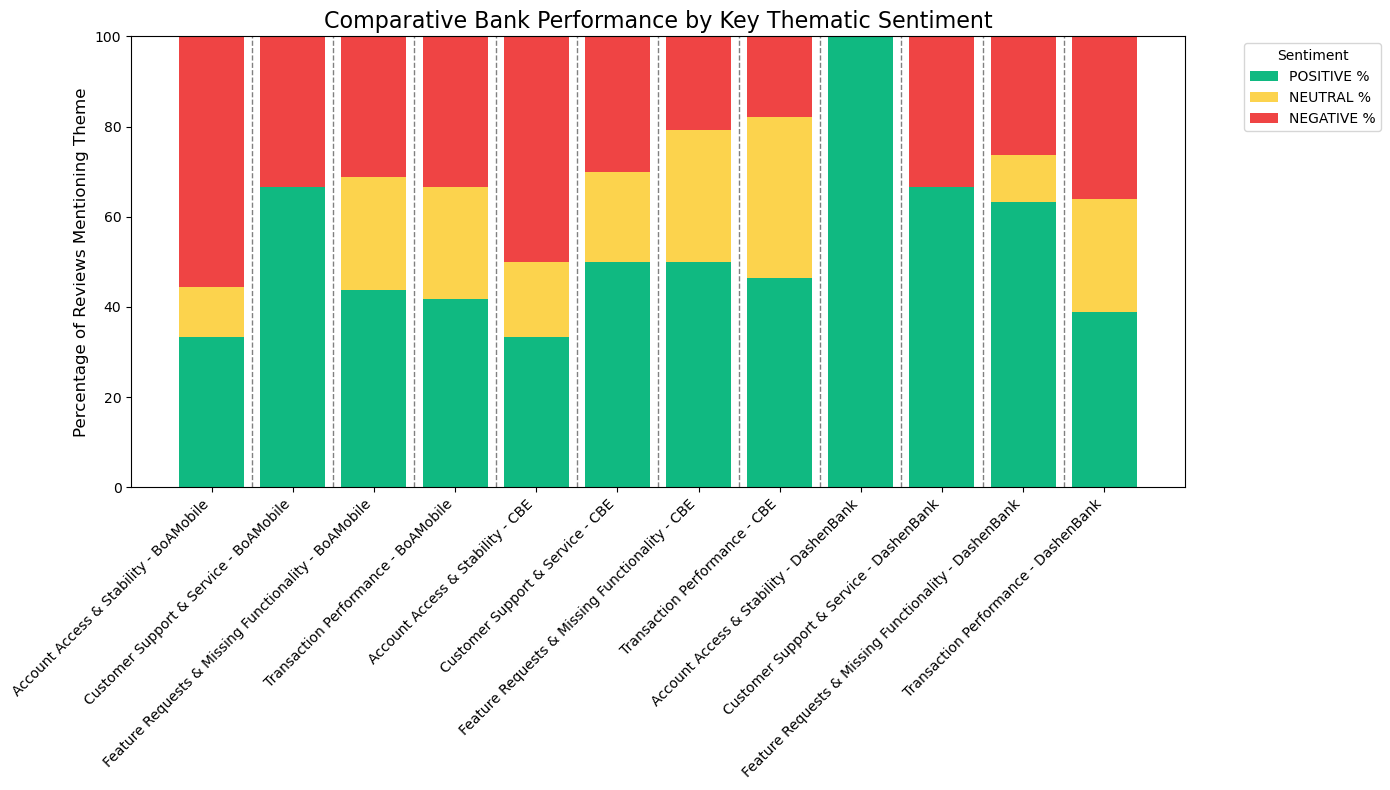

Comparative Theme Sentiment Visualization displayed.


In [10]:
if not comparative_theme_data.empty:       
    # Generate a narrative comparison report
    banks = themed_sentiment_df['bank'].unique()
    if len(banks) >= 2:
        bank1, bank2 = banks[0], banks[1]
        
        print(f"\n--- Comparison between {bank1} and {bank2} ---")
        
        # Iterate over the top 3 themes
        top_themes_for_narrative = comparative_theme_data['theme'].value_counts().nlargest(3).index
        
        for theme in top_themes_for_narrative:
            theme_data = comparative_theme_data[comparative_theme_data['theme'] == theme]
            
            if bank1 in theme_data['bank'].values and bank2 in theme_data['bank'].values:
                b1_data = theme_data[theme_data['bank'] == bank1].iloc[0]
                b2_data = theme_data[theme_data['bank'] == bank2].iloc[0]

                b1_pos, b1_neg = b1_data['POSITIVE %'], b1_data['NEGATIVE %']
                b2_pos, b2_neg = b2_data['POSITIVE %'], b2_data['NEGATIVE %']
                
                performance_gap = round(b1_pos - b2_pos, 1)

                print(f"\n[Theme: {theme}]")
                print(f"  {bank1}: {b1_pos:.1f}% Positive, {b1_neg:.1f}% Negative (Total {b1_data['Total Mentions']} mentions)")
                print(f"  {bank2}: {b2_pos:.1f}% Positive, {b2_neg:.1f}% Negative (Total {b2_data['Total Mentions']} mentions)")
                
                if performance_gap > 5:
                    print(f"  Insight: {bank1} significantly outperforms {bank2} on this theme (+{performance_gap}% Positive gap).")
                elif performance_gap < -5:
                    print(f"  Insight: {bank2} significantly outperforms {bank1} on this theme (-{performance_gap}% Positive gap).")
                else:
                    print("  Insight: Performance is competitive for this theme.")
                    
    # 3. Visualization
    plot_theme_sentiment_distribution(comparative_theme_data)

print("="*70)

In [11]:
#  Generate and print improvement suggestions
print("\n" + "="*70)
print("💡 ACTIONABLE IMPROVEMENT SUGGESTIONS")
print("="*70)
suggestions = generate_improvement_suggestions(comparative_theme_data)

for bank, list_suggestions in suggestions.items():
    print(f"\n--- Suggestions for {bank} ---")
    for i, suggestion in enumerate(list_suggestions, 1):
        print(f"  {i}. {suggestion}")


💡 ACTIONABLE IMPROVEMENT SUGGESTIONS

--- Suggestions for BoAMobile ---
  1. **Critical Priority Fix:** Focus on the 'Account Access & Stability' theme, which has the bank's highest negative sentiment (55.6%). This suggests fundamental defects. Launch an immediate bug triage and user flow audit for all components related to this theme (e.g., login, transfer flows).
  2. **Competitive Focus:** The bank significantly lags in 'User Interface & Experience' (Positive Gap: -30.7%). The rival CBE achieves 66.7% positive sentiment here. Conduct a competitive teardown of CBE's specific implementation for this feature/service to rapidly close the performance gap.

--- Suggestions for CBE ---
  1. **Critical Priority Fix:** Focus on the 'Account Access & Stability' theme, which has the bank's highest negative sentiment (50.0%). This suggests fundamental defects. Launch an immediate bug triage and user flow audit for all components related to this theme (e.g., login, transfer flows).
  2. **Compe